In [1]:
#dataset I need: first names of all bootcamp graduates/attendees (manually/scraping) - Linkedin
#treatment I need: classification based on first names into male/female (Naive Bayes with dictionaries of most common names?)

#look at word stems
#how many features 
#Facebook API is pretty limited--first names and genders from public profiles from Facebook
#Find a Wikipedia project containing all the articles: organize in a taxinomy: gender/first name with labels, look into XML dumps
#open source dictionary

#two big challenges
#Wrangling together as many as name/gender matches to create a classifier
#Wrangling together first names of bootcamp graduates

#http://stackoverflow.com/questions/33440939/cant-pip-install-packages-in-anaconda
#https://en.wikipedia.org/wiki/Category:Feminine_given_names

# Importing Data and Prerequisite Libraries 

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import requests
from bs4 import BeautifulSoup
import matplotlib as mlp
mlp.use("TKAgg")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import social security names database from Kaggle in int form
names = pd.read_csv("NationalNames.csv", dtype = {'Count': np.int32})
names.head(3)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003


In [5]:
names = names.fillna(0)
names

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


## Grouping names by gender count

In [7]:
namegroup = names.groupby(['Name', 'Gender'])['Count'].sum()
namegroup.head()

Name       Gender
Aaban      M          72
Aabha      F          21
Aabid      M           5
Aabriella  F          10
Aadam      M         196
Name: Count, dtype: int32

In [30]:
namegroup["Roger"]["F"]

1689

In [31]:
namegroup["Roger"]["M"]

437870

In [32]:
namegroup["Roger"]["M"]/sum(namegroup["Roger"])

0.99615751241585315

## Training the Naive Bayes model for data not provided

In [8]:
namechart = pd.DataFrame(namegroup)
namechart.head()

,,Count
Name,Gender,
Aaban,M,72
Aabha,F,21
Aabid,M,5
Aabriella,F,10
Aadam,M,196


In [9]:
namechart = names.groupby(['Name', 'Gender'], as_index = False)['Count'].sum()
namechart.head(3)

,Name,Gender,Count
0,Aaban,M,72
1,Aabha,F,21
2,Aabid,M,5


In [10]:
namechartdiff = namechart.reset_index().pivot('Name', 'Gender', 'Count')
namechartdiff.head()

Gender,F,M
Name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [11]:
namechartdiff = namechartdiff.fillna(0)
namechartdiff.head(3)

Gender,F,M
Name,,
Aaban,0.0,72.0
Aabha,21.0,0.0
Aabid,0.0,5.0


In [12]:
namechartdiff["Mpercent"] = ((namechartdiff["M"] - namechartdiff["F"])/(namechartdiff["M"] + namechartdiff["F"]))
namechartdiff.head(3)

Gender,F,M,Mpercent
Name,,,
Aaban,0.0,72.0,1.0
Aabha,21.0,0.0,-1.0
Aabid,0.0,5.0,1.0


In [14]:
Aamari = namechartdiff[namechartdiff.index == "Aamari"]
Aamari

Gender,F,M,Mpercent,gender
Name,,,,
Aamari,67.0,88.0,0.135484,female


In [15]:
#NAIVEBAYES MODEL START

from sklearn.feature_extraction.text import CountVectorizer 

char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X = char_vectorizer.fit_transform(namechartdiff.index)
X = X.tocsc()
y = (namechartdiff.gender == 'male').values.astype(np.int)

print(X)

  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (64876, 616)	1
  (67519, 616)	1
  (67520, 616)	1
  (67521, 616)	1
  (72287, 616)	1
  (73357, 616)	1
  (73358, 616)	1
  (76118, 616)	1
  (81252, 616)	1
  (81253, 616)	1
  (81254, 616)	1
  (81255, 616)	1
  (81256, 616)	1
  (83577, 616)	1
  (88001, 616)	1
  (88002, 616)	1
  (88270, 616)	1
  (91145, 616)	1
  (91333, 616)	1
  (91334, 616)	1
  (91335, 616)	1
  (91336, 616)	1
  (91604, 616)	1
  (92000, 616)	1
  (93888, 616)	1


In [16]:
print(X.shape)

(93889, 617)


In [17]:
#splitting into test and train sets with 30% holdout set
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(range(namechartdiff.shape[0]), train_size=0.7)
mask=np.ones(namechartdiff.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [18]:
#training first pass on the model (alpha is default)
Xtrainthis=X[mask]
Ytrainthis=y[mask]
Xtestthis=X[~mask]
Ytestthis=y[~mask]
clf = MultinomialNB(alpha = 1)
clf.fit(Xtrainthis, Ytrainthis)
training_accuracy = clf.score(Xtrainthis,Ytrainthis)
test_accuracy = clf.score(Xtestthis,Ytestthis)
        
print(training_accuracy)
print(test_accuracy)

0.743160585496
0.740689459296


In [19]:
#printing confusion matrix. Low true positive rate (perhaps some error with ambigious names?)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(Ytestthis, clf.predict(Xtestthis)))

[[15134  2914]
 [ 4390  5729]]


## Defining the lookup + Naive Bayes function and initial results

In [73]:
#this is where the magic happens
def lookup(x):
    str(x)
    try:
        #0.59 is determined by 99% of values that fall under this range
        if namegroup[x]["M"]/sum(namegroup[x]) > 0.59:
            print (x + " " + "It's a male name.")
        elif (namegroup[x]["M"]/sum(namegroup[x]) <= 0.59 and namegroup[x]["M"]/sum(namegroup[x]) >= 0.41): 
            print(x + " " + "It's an ambiguous name!")
        else:
            print (x + " " + "It's a female name.")
    #where the naive bayes will work for names outside the table
    except KeyError:
        new = char_vectorizer.transform([x])
        y_pred = clf.predict(new)
        if y_pred == 1:
            print(x + " " + "It's a male name we had to machine learn!")
        else:
            print(x + " " + "It's a female name we had to machine learn!")

In [22]:
lookup("Maximo")

It's a male name.


In [23]:
lookup("Jeremiaht")

It's a female name we had to machine learn!


In [24]:
lookup("Jin")

It's a male name.


In [25]:
lookup("Aalijah")

It's a male name.


In [26]:
lookup("Cortana")

It's a female name we had to machine learn!


In [27]:
lookup("Siri")

It's a female name we had to machine learn!


In [28]:
lookup("Aaris")

It's an ambiguous name!


In [29]:
lookup("Yael")

It's an ambiguous name!


In [30]:
lookup("Rajit")

It's a male name.


In [31]:
namegroup["Rajit"]

Gender
M    14
Name: Count, dtype: int32

In [32]:
lookup("Gautam")

It's a male name.


In [33]:
namegroup["Gautam"]

Gender
M    574
Name: Count, dtype: int32

In [34]:
namegroup["Jin"]

Gender
F    359
M    977
Name: Count, dtype: int32

In [35]:
namegroup["Elmo"]

Gender
F      247
M    10078
Name: Count, dtype: int32

In [36]:
lookup("Dylan")

It's a male name.


In [13]:
namegroup["Dylan"]

Gender
F      9326
M    331731
Name: Count, dtype: int32

In [43]:
names = ["Roger", "Ali", "Steve", "Rosa", "Cortana"]
for name in names:
    lookup(name)

It's a male name.
It's a male name.
It's a male name.
It's a female name.
It's a female name we had to machine learn!


In [106]:
namegroup["Taylor"]

Gender
F    308130
M    107966
Name: Count, dtype: int32

## Appendix: looking up which names are ambigious

In [37]:
namechartdiff["MMF"] = abs((namechartdiff["M"] - namechartdiff["F"])/(namechartdiff["M"] + namechartdiff["F"]))
namechartdiff.head(3)

Gender,F,M,Mpercent,gender,MMF
Name,,,,,
Aaban,0.0,72.0,1.0,male,1.0
Aabha,21.0,0.0,-1.0,female,1.0
Aabid,0.0,5.0,1.0,male,1.0


In [42]:
namechartdiff.MMF.quantile(.01)

0.18518518518518517

In [38]:
ambiname = namechartdiff[namechartdiff.MMF < namechartdiff.MMF.quantile(.01)]
ambiname

Gender,F,M,Mpercent,gender,MMF
Name,,,,,
Aalijah,107.0,155.0,0.183206,male,0.183206
Aamari,67.0,88.0,0.135484,female,0.135484
Aaris,28.0,29.0,0.017544,female,0.017544
Aavyn,5.0,6.0,0.090909,female,0.090909
Abiyah,5.0,5.0,0.000000,female,0.000000
Abrar,330.0,296.0,-0.054313,female,0.054313
Abraxas,5.0,6.0,0.090909,female,0.090909
Adair,1191.0,1312.0,0.048342,female,0.048342
Adason,5.0,5.0,0.000000,female,0.000000


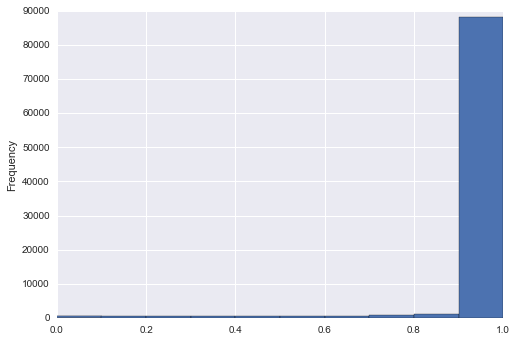

In [39]:
namechartdiff.MMF.plot(kind= "hist")

## Importing names from Course Report

In [63]:
#1 how do I automate this across different pages? Different workshops, different pages
#create base string and loop
review = requests.get("https://www.coursereport.com/schools/galvanize?page=1#/reviews")
r = BeautifulSoup(review.text, "lxml")
first_name = r.find_all('div', {'class': 'reviewer-details'})

In [64]:
print(first_name)

[<div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span> • Developer Evangelist </span><span></span><span class="hidden-xs"> •  Course: Web Development </span><span class="hidden-xs"> •  Campus: Boulder </span></div>, <div class="reviewer-details"><span class="reviewer-name">kt </span><span> • Front-End Engineer  </span><span> • Graduate </span><span class="hidden-xs"> •  Course: Web Development </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span></span><span> • Graduate </span><span class="hidden-xs"> •  Course: Galvanize Data Science </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="reviewer-details"><span class="reviewer-name">Anonymous</span><span></span><span> • Graduate </span><span class="hidden-xs"> •  Course: Galvanize Data Science </span><span class="hidden-xs"> •  Campus: San Francisco </span></div>, <div class="review

In [46]:
spans = r.find_all('span', attrs={'class':'reviewer-name'})
for span in spans:
    print (span.string)

Anonymous
kt 
Anonymous
Anonymous
Steve 
Anna VM 
Jennifer Dunne 
Josh Cantor 
Anonymous
Gerard Cote 
Anonymous
Anonymous
Alex Braun 
Anonymous
Elana Kopelevich 
Anonymous
Anonymous
Colin 
Anonymous
Eric Hullander 
Anonymous
Japneet Singh 
J 
Anonymous
Anonymous


In [51]:
cleanspans = []
for span in spans:
    if span.string != "Anonymous":
        cleanspans.append(span)
        print (span.string)


kt 
Steve 
Anna VM 
Jennifer Dunne 
Josh Cantor 
Gerard Cote 
Alex Braun 
Elana Kopelevich 
Colin 
Eric Hullander 
Japneet Singh 
J 


In [128]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/galvanize?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [126]:
print(data)

kt 


In [118]:
base_url = "https://www.coursereport.com/schools/galvanize?page="   
url = base_url + str(2) + "#/reviews"
get_data(url)

In [120]:
get_data("https://www.coursereport.com/schools/galvanize?page=2#/reviews")

In [129]:
print(cleanspans)

['kt ', 'Steve ', 'Anna VM ', 'Jennifer Dunne ', 'Josh Cantor ', 'Gerard Cote ', 'Alex Braun ', 'Elana Kopelevich ', 'Colin ', 'Eric Hullander ', 'Japneet Singh ', 'J ', 'M ', 'Moses Marsh ', 'Frank ', 'Derik Linch ', 'Tim Hou ', 'Matthew Bird ', 'Anonymous ', 'Robert Hajek ', 'Anonymous ', 'Roberto Ortega ', 'Anonymous ', 'Taylor ', 'Anonymous ', 'Scott Cronin ', 'Anonymous ', 'Anonymous ', 'Jeffrey Roach ', 'Anonymous ', 'Zubair Desai ', 'Lorien S. ', 'Tony Nguyen ', 'Mike ', 'Anonymous ', 'Anonymous ', 'Cameron ', 'Layne ']


In [135]:
galvanize = set(cleanspans)

In [136]:
print(galvanize)

{'Josh Cantor ', 'Layne ', 'Taylor ', 'Jennifer Dunne ', 'Colin ', 'J ', 'Gerard Cote ', 'Moses Marsh ', 'Lorien S. ', 'Cameron ', 'Matthew Bird ', 'Derik Linch ', 'Robert Hajek ', 'Elana Kopelevich ', 'Japneet Singh ', 'Scott Cronin ', 'Anonymous ', 'Alex Braun ', 'Zubair Desai ', 'Mike ', 'Roberto Ortega ', 'Jeffrey Roach ', 'Tim Hou ', 'Tony Nguyen ', 'Anna VM ', 'kt ', 'Eric Hullander ', 'Steve ', 'M ', 'Frank '}


In [137]:
len(galvanize)

30

In [89]:
nyc = []
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = BeautifulSoup(response.text, "lxml")
        spans = data.find_all('span', attrs={'class':'reviewer-name'})
        for span in spans:
            if span.string != "Anonymous":
                nyc.append(span.string)
    else:
        return(response.text)
        return(response.status_code)

In [90]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/nyc-data-science-academy?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

ConnectionError: HTTPSConnectionPool(host='www.coursereport.com', port=443): Max retries exceeded with url: /schools/nyc-data-science-academy?page=1 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x1227e6780>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [143]:
print(nyc)

['Jurgen de Jager ', 'Arda Kosar ', 'Tingyan Zheng ', 'Bin Lin ', 'Melita ', 'Tatiana Sorokina ', 'Robert Castellano ', 'Jiaqi L ', 'Iris Huang ', 'Ho Fai Wong ', 'Kelly ', 'Denis Nguyen ', 'Yuka ', 'Adam Cone ', 'Wendy ', 'David Steinmetz ', 'Anonymous ', 'Anonymous ', 'Christopher Redino ', 'Sricharan Maddineni ', 'Joseph Lee ', 'Korrigan ', 'Fangzhou ', 'John ', 'Anonymous ', 'Sebastian Nordgren ', 'Jake ', 'David Comfort ', 'Nate Aiken ', 'JF Darre ', 'Shin Chin ', 'Dani ', 'Jason ', 'Pokman ', 'Punam ', 'Sam ', 'Liz ', 'Bret Fontecchio ', 'Anonymous ', 'Anonymous ', 'anonymous ', 'Anonymous ']


In [144]:
nyc = set(nyc)
print(nyc)

{'Sebastian Nordgren ', 'Jiaqi L ', 'Ho Fai Wong ', 'Adam Cone ', 'Liz ', 'Bin Lin ', 'Punam ', 'Korrigan ', 'Melita ', 'Denis Nguyen ', 'Sam ', 'Wendy ', 'Arda Kosar ', 'Jurgen de Jager ', 'Nate Aiken ', 'Kelly ', 'Anonymous ', 'Bret Fontecchio ', 'Shin Chin ', 'Fangzhou ', 'Jake ', 'Tingyan Zheng ', 'Dani ', 'Robert Castellano ', 'Tatiana Sorokina ', 'Sricharan Maddineni ', 'Jason ', 'Joseph Lee ', 'David Comfort ', 'Iris Huang ', 'Yuka ', 'JF Darre ', 'Pokman ', 'anonymous ', 'John ', 'David Steinmetz ', 'Christopher Redino '}


In [145]:
len(nyc)

37

In [148]:
print(metis)

['Max Melnick ', 'Emmanuele Salvati ', 'Brian Kim ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Revanth Reddy Garlapati ', 'Anonymous ', 'Anonymous ']


In [81]:
byte = []
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = BeautifulSoup(response.text, "lxml")
        spans = data.find_all('span', attrs={'class':'reviewer-name'})
        for span in spans:
            if span.string != "Anonymous":
                byte.append(span.string)
    else:
        return(response.text)
        return(response.status_code)

In [82]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/byte-academy?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

In [83]:
print(byte)

['Ben ', 'Matt ', 'Nat Greenwald ', 'Rod ', 'Dan ', 'Sulekha ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Shehryar Khan ', 'Anonymous ', 'Cody ', 'Graduate ', 'Josh ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'Yulia ', 'Benjamin Mukasa ', 'Anonymous ', 'Anthony ', 'Adam J ', 'Anonymous ', 'Jesse ', 'Anonymous ', 'Anonymous ', 'Anonymous ', 'William mantly ', 'Anthony Keating ', 'Anonymous ']


In [84]:
len(byte)

30

In [86]:
metis = []
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = BeautifulSoup(response.text, "lxml")
        spans = data.find_all('span', attrs={'class':'reviewer-name'})
        for span in spans:
            if span.string != "Anonymous":
                metis.append(span.string)
    else:
        return(response.text)
        return(response.status_code)

In [91]:
page_url = 1
for i in range(5): # 5 pages of 20 results each
    base_url = "https://www.coursereport.com/schools/metis?page="   
    url = base_url + str(page_url) + "#/reviews"
    data = get_data(url)
    page_url += 1

ConnectionError: HTTPSConnectionPool(host='www.coursereport.com', port=443): Max retries exceeded with url: /schools/metis?page=1 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x1227e0be0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [78]:
print(metis)

[]


In [98]:
names = []
for x in byte:
    if x != 'Anonymous ':
        fn = x.split()[0]
        names.append(fn)
        
print(names)

['Ben', 'Matt', 'Nat', 'Rod', 'Dan', 'Sulekha', 'Shehryar', 'Cody', 'Graduate', 'Josh', 'Yulia', 'Benjamin', 'Anthony', 'Adam', 'Jesse', 'William', 'Anthony']


In [ ]:
byte = []
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = BeautifulSoup(response.text, "lxml")
        spans = data.find_all('span', attrs={'class':'reviewer-name'})
        for span in spans:
            if span.string != "Anonymous":
                byte.append(span.string)
    else:
        return(response.text)
        return(response.status_code)

In [93]:
nyc = ['Jurgen de Jager ', 'Arda Kosar ', 'Tingyan Zheng ', 'Bin Lin ', 'Melita ', 'Tatiana Sorokina ', 'Robert Castellano ', 'Jiaqi L ', 'Iris Huang ', 'Ho Fai Wong ', 'Kelly ', 'Denis Nguyen ', 'Yuka ', 'Adam Cone ', 'Wendy ', 'David Steinmetz ', 'Anonymous ', 'Anonymous ', 'Christopher Redino ', 'Sricharan Maddineni ', 'Joseph Lee ', 'Korrigan ', 'Fangzhou ', 'John ', 'Anonymous ', 'Sebastian Nordgren ', 'Jake ', 'David Comfort ', 'Nate Aiken ', 'JF Darre ', 'Shin Chin ', 'Dani ', 'Jason ', 'Pokman ', 'Punam ', 'Sam ', 'Liz ', 'Bret Fontecchio ', 'Anonymous ', 'Anonymous ', 'anonymous ', 'Anonymous ']
galvanize = ['kt ', 'Steve ', 'Anna VM ', 'Jennifer Dunne ', 'Josh Cantor ', 'Gerard Cote ', 'Alex Braun ', 'Elana Kopelevich ', 'Colin ', 'Eric Hullander ', 'Japneet Singh ', 'J ', 'M ', 'Moses Marsh ', 'Frank ', 'Derik Linch ', 'Tim Hou ', 'Matthew Bird ', 'Anonymous ', 'Robert Hajek ', 'Anonymous ', 'Roberto Ortega ', 'Anonymous ', 'Taylor ', 'Anonymous ', 'Scott Cronin ', 'Anonymous ', 'Anonymous ', 'Jeffrey Roach ', 'Anonymous ', 'Zubair Desai ', 'Lorien S. ', 'Tony Nguyen ', 'Mike ', 'Anonymous ', 'Anonymous ', 'Cameron ', 'Layne ']

In [99]:
for x in nyc:
    if x != 'Anonymous ':
        fn = x.split()[0]
        names.append(fn)

In [100]:
for x in galvanize:
    if x != 'Anonymous ':
        fn = x.split()[0]
        names.append(fn)

In [101]:
print(names)

['Ben', 'Matt', 'Nat', 'Rod', 'Dan', 'Sulekha', 'Shehryar', 'Cody', 'Graduate', 'Josh', 'Yulia', 'Benjamin', 'Anthony', 'Adam', 'Jesse', 'William', 'Anthony', 'Jurgen', 'Arda', 'Tingyan', 'Bin', 'Melita', 'Tatiana', 'Robert', 'Jiaqi', 'Iris', 'Ho', 'Kelly', 'Denis', 'Yuka', 'Adam', 'Wendy', 'David', 'Christopher', 'Sricharan', 'Joseph', 'Korrigan', 'Fangzhou', 'John', 'Sebastian', 'Jake', 'David', 'Nate', 'JF', 'Shin', 'Dani', 'Jason', 'Pokman', 'Punam', 'Sam', 'Liz', 'Bret', 'anonymous', 'kt', 'Steve', 'Anna', 'Jennifer', 'Josh', 'Gerard', 'Alex', 'Elana', 'Colin', 'Eric', 'Japneet', 'J', 'M', 'Moses', 'Frank', 'Derik', 'Tim', 'Matthew', 'Robert', 'Roberto', 'Taylor', 'Scott', 'Jeffrey', 'Zubair', 'Lorien', 'Tony', 'Mike', 'Cameron', 'Layne']


In [102]:
for name in names:
    lookup(name)

Ben It's a male name.
Matt It's a male name.
Nat It's a male name.
Rod It's a male name.
Dan It's a male name.
Sulekha It's a female name we had to machine learn!
Shehryar It's a male name.
Cody It's a male name.
Graduate It's a male name we had to machine learn!
Josh It's a male name.
Yulia It's a female name we had to machine learn!
Benjamin It's a male name.
Anthony It's a male name.
Adam It's a male name.
Jesse It's a male name.
William It's a male name.
Anthony It's a male name.
Jurgen It's a male name.
Arda It's an ambiguous name!
Tingyan It's a female name we had to machine learn!
Bin It's a male name.
Melita It's a female name we had to machine learn!
Tatiana It's a female name.
Robert It's a male name.
Jiaqi It's a female name we had to machine learn!
Iris It's a female name.
Ho It's a male name.
Kelly It's a female name.
Denis It's a male name.
Yuka It's a male name we had to machine learn!
Adam It's a male name.
Wendy It's a female name.
David It's a male name.
Christopher I

In [104]:
fn = pd.Series(names)

In [105]:
fn.value_counts()

Josh           2
Anthony        2
Adam           2
David          2
Robert         2
Moses          1
Matthew        1
Joseph         1
Ho             1
Taylor         1
Jason          1
Steve          1
Arda           1
Sricharan      1
Gerard         1
M              1
Yuka           1
Jurgen         1
Tatiana        1
Sam            1
Liz            1
Roberto        1
anonymous      1
Alex           1
Benjamin       1
Shehryar       1
Zubair         1
Ben            1
Denis          1
kt             1
              ..
Jake           1
Elana          1
Japneet        1
Jiaqi          1
Sulekha        1
Mike           1
Lorien         1
Nat            1
Bret           1
Cody           1
JF             1
Layne          1
Tingyan        1
Cameron        1
Jeffrey        1
Jennifer       1
Melita         1
Anna           1
Christopher    1
Kelly          1
Iris           1
John           1
Eric           1
J              1
Frank          1
Pokman         1
Dani           1
Korrigan      